In [2]:
cd ..

/cellar/users/agross/TCGA_Code/Methlation


In [3]:
import NotebookImport
from Setup.Imports import *

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [4]:
import Parallel.Age_HIV_Features as fx

importing IPython notebook from Parallel/Age_HIV_Features

importing IPython notebook from HIV_Age_Advancement

importing IPython notebook from Setup/MethylationAgeModels

importing IPython notebook from Setup/Read_HIV_Data

In [5]:
dx_age = fx.rr

In [6]:
path = '/cellar/users/agross/Data/Methylation_Controls/'

In [7]:
monocyte_corr = pd.read_csv(path + 'monocyte_age_corr.csv',
                            index_col=0, squeeze=True)
cd4_corr = pd.read_csv(path + 'CD4T_age_corr.csv',
                            index_col=0, squeeze=True)
neu_corr = pd.read_csv(path + 'neutrophils_age_corr.csv',
                            index_col=0, squeeze=True)
beta_corr = pd.read_csv(path + 'Beta_age_corr.csv',
                            index_col=0, squeeze=True)

In [8]:
d1 = fx.res.in_set_s1.multi_variate.age > 0
d2 = fx.res.in_set_s3.multi_variate.age > 0

In [9]:
dd = fx.res.in_set_s1.multi_variate.age > 0
dd.name = 'up'
age_dx = fx.g_age
age_dx.name = 'age'

dx_age = combine(fx.g_age, dd).replace({'up':'neither','age':'age_down', 'both':'age_up'})
dx_age.value_counts()

neither     446117
age_down     13840
age_up       13087
dtype: int64

In [10]:
dd = fx.r4.multi_variate.HIV > 0
dd.name = 'up'
hiv_dx = fx.g_hiv
hiv_dx.name = 'hiv'

dx_hiv = combine(hiv_dx, dd).replace({'up':'neither','hiv':'hiv_down', 'both':'hiv_up'})
dx_hiv.value_counts()

neither     391683
hiv_down     46220
hiv_up       35141
dtype: int64

In [11]:
fisher_exact_test(dx_hiv == 'hiv_up', dx_age == 'age_up')

odds_ratio    3.2
p             0.0
dtype: float64

In [12]:
fisher_exact_test(dx_hiv == 'hiv_down', dx_age == 'age_down')

odds_ratio    1.37e+00
p             2.90e-31
dtype: float64

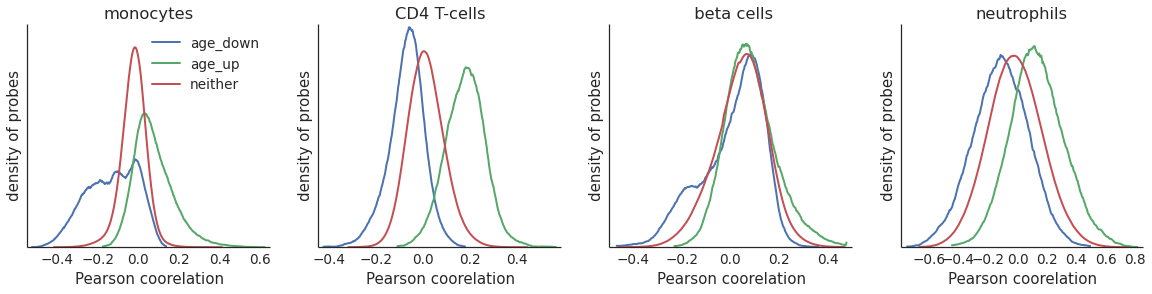

In [13]:
fig, axs = subplots(1,4, figsize=(20,4))
draw_dist(monocyte_corr, dx_age, ax=axs[0])
draw_dist(cd4_corr, dx_age, ax=axs[1])
draw_dist(beta_corr.clip(-.5,.5), dx_age, ax=axs[2])
draw_dist(neu_corr, dx_age, ax=axs[3])
labels = ['monocytes','CD4 T-cells',' beta cells', 'neutrophils']
for i,ax in enumerate(axs):
    ax.set_title(labels[i])
    ax.set_xlabel('Pearson coorelation')
    prettify_ax(ax)
    ax.set_ylabel('density of probes')
    ax.set_yticks([])
    ax.legend_.set_visible(False)
axs[0].legend(loc='upper right')

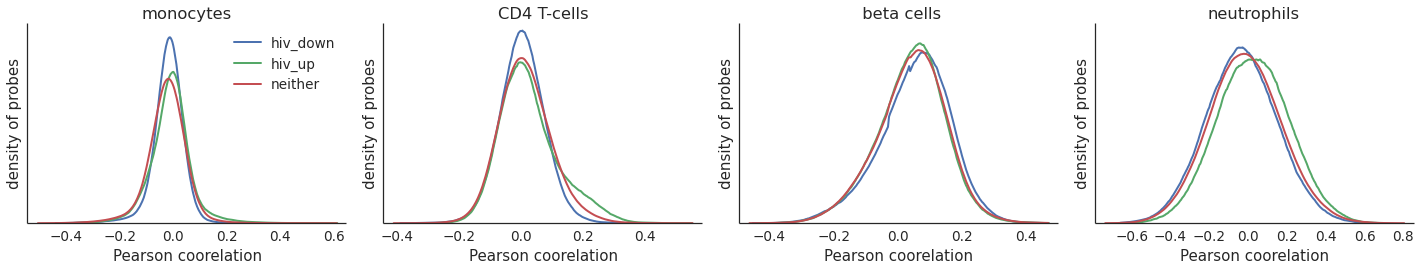

In [14]:
fig, axs = subplots(1,4, figsize=(20,4))
draw_dist(monocyte_corr, dx_hiv, ax=axs[0])
draw_dist(cd4_corr, dx_hiv, ax=axs[1])
draw_dist(beta_corr.clip(-.5,.5), dx_hiv, ax=axs[2])
draw_dist(neu_corr, dx_hiv, ax=axs[3])
labels = ['monocytes','CD4 T-cells',' beta cells', 'neutrophils']
for i,ax in enumerate(axs):
    ax.set_title(labels[i])
    ax.set_xlabel('Pearson coorelation')
    prettify_ax(ax)
    ax.set_ylabel('density of probes')
    ax.set_yticks([])
    ax.legend_.set_visible(False)
axs[0].legend(loc='upper right')
fig.tight_layout()

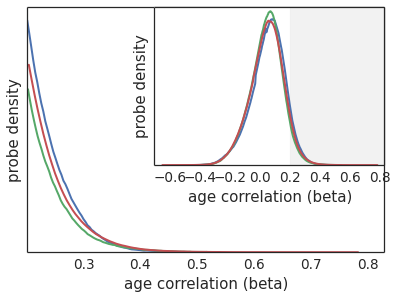

In [15]:
beta_corr.name = 'age correlation (beta)'
draw_dist(beta_corr, dx_hiv, lim=.2, inset=True, legend=False)

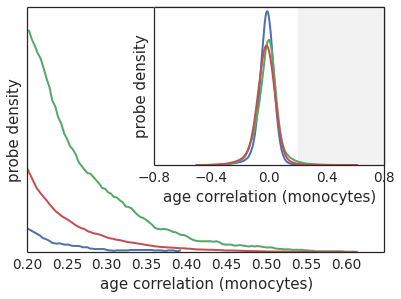

In [18]:
monocyte_corr.name = 'age correlation (monocytes)'
draw_dist(monocyte_corr, dx_hiv, lim=.2, inset=True, legend=False)
plt.gca().set_xticks([-.8, -.4, 0, .4, .8]);

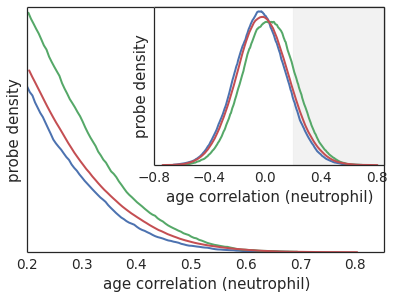

In [16]:
neu_corr.name = 'age correlation (neutrophil)'
draw_dist(neu_corr, dx_hiv, lim=.2, inset=True, legend=False)
plt.gca().set_xticks([-.8, -.4, 0, .4, .8]);

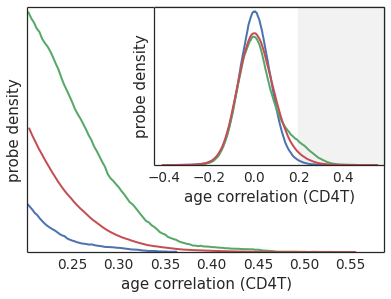

In [17]:
cd4_corr.name = 'age correlation (CD4T)'
draw_dist(cd4_corr, dx_hiv, lim=.2, inset=True, legend=False)

In [18]:
ct = pd.crosstab(dx_age == 'age_up', [monocyte_corr > .2, cd4_corr > .2, beta_corr > .2,
                                 neu_corr > .2],
                rownames=['age'], colnames=['monocytes','CD4','beta','neu']).T
ct

age                           False  True 
monocytes CD4   beta  neu                 
False     False False False  384966   5208
                      True    46221   1622
                True  False   19087    523
                      True     4010    346
          True  False False    3489   2392
                      True     1211   1199
                True  False     315    225
                      True      201    232
True      False False False      60     65
                      True       87     96
                True  False      23     21
                      True       33     48
          True  False False      72    216
                      True      126    529
                True  False      12     46
                      True       43    319